In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [3]:
def niejednorodny_proces_poissona(lambda_t, T, num_simulations=10000):
    times = []
    for _ in range(num_simulations):
        t = 0
        event_times = []
        while t < T:
            u = np.random.uniform()
            inter_event_time = -np.log(u) / lambda_t(t)
            t_candidate = t + inter_event_time
            if t_candidate < T:
                u_thin = np.random.uniform()
                thinning_prob = lambda_t(t_candidate) / lambda_t_max
                if u_thin <= thinning_prob:
                    event_times.append(t_candidate)
                    t = t_candidate
                else:
                    t = t_candidate
            else:
                break
        times.append(len(event_times))
    return times

In [4]:
def lambda_t(t):
    return 0.5 + 0.2 * np.sin(2 * np.pi * t / 24)

T = 24
lambda_t_max = max(lambda_t(t) for t in np.linspace(0, T, 1000))

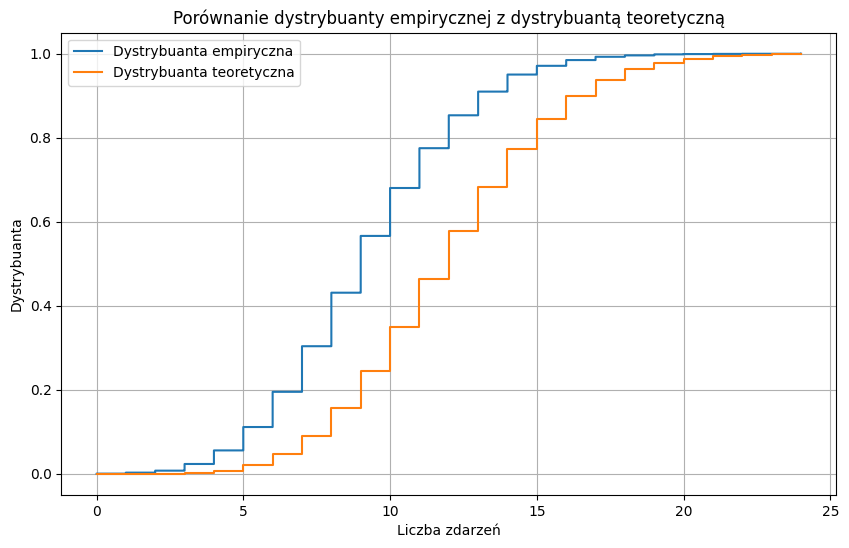

In [5]:
# Symulacja procesu Poissona
simulated_counts = niejednorodny_proces_poissona(lambda_t, T)

# Obliczenie teoretycznej dystrybuanty dla rozkładu Poissona
mean_lambda_integral = np.trapz([lambda_t(t) for t in np.linspace(0, T, 1000)], dx=T/1000)
poisson_dist = poisson(mu=mean_lambda_integral)
x = np.arange(0, max(simulated_counts) + 1)

# Obliczenie dystrybuanty empirycznej
sorted_counts = np.sort(simulated_counts)
empirical_cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

# Obliczenie dystrybuanty teoretycznej
theoretical_cdf = poisson_dist.cdf(x)

# Wygenerowanie wykresu
plt.figure(figsize=(10, 6))

# Wykres dystrybuanty empirycznej
plt.step(sorted_counts, empirical_cdf, label='Dystrybuanta empiryczna', where='post')

# Wykres dystrybuanty teoretycznej
plt.step(x, theoretical_cdf, label='Dystrybuanta teoretyczna', where='post')

plt.xlabel('Liczba zdarzeń')
plt.ylabel('Dystrybuanta')
plt.title('Porównanie dystrybuanty empirycznej z dystrybuantą teoretyczną')
plt.legend()
plt.grid(True)
plt.show()